### 1. What is the underlying concept of Support Vector Machines?

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes.

SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes, as shown in the image below.

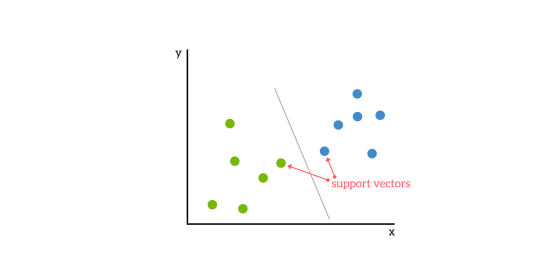

`Support vectors` are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set.

`Hyperplane`
 
As a simple example, for a classification task with only two features (like the image above), you can think of a hyperplane as a line that linearly separates and classifies a set of data.

Intuitively, the further from the hyperplane our data points lie, the more confident we are that they have been correctly classified. We therefore want our data points to be as far away from the hyperplane as possible, while still being on the correct side of it.

So when new testing data is added, whatever side of the hyperplane it lands will decide the class that we assign to it.

`How do we find the right hyperplane?`
 
Or, in other words, how do we best segregate the two classes within the data?

The distance between the hyperplane and the nearest data point from either set is known as the margin. The goal is to choose a hyperplane with the greatest possible margin between the hyperplane and any point within the training set, giving a greater chance of new data being classified correctly.

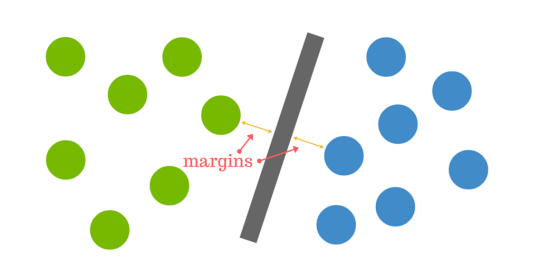

`But what happens when there is no clear hyperplane?`
 
This is where it can get tricky. Data is rarely ever as clean as our simple example above. A dataset will often look more like the jumbled balls below which represent a linearly non separable dataset.

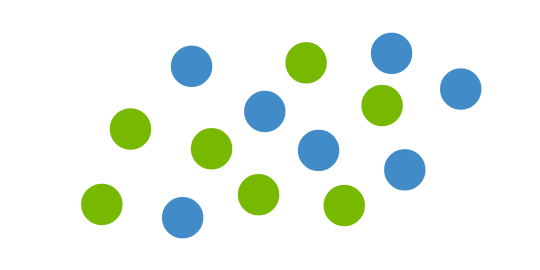

In order to classify a dataset like the one above it’s necessary to move away from a 2d view of the data to a 3d view. Explaining this is easiest with another simplified example. Imagine that our two sets of colored balls above are sitting on a sheet and this sheet is lifted suddenly, launching the balls into the air. While the balls are up in the air, you use the sheet to separate them. This ‘lifting’ of the balls represents the mapping of data into a higher dimension. This is known as kernelling. 

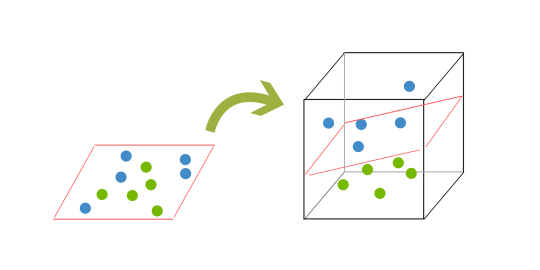

Because we are now in three dimensions, our hyperplane can no longer be a line. It must now be a plane as shown in the example above. The idea is that the data will continue to be mapped into higher and higher dimensions until a hyperplane can be formed to segregate it.

### 2. What is the concept of a support vector?

The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.

### 3. When using SVMs, why is it necessary to scale the inputs?

Feature scaling is crucial for some machine learning algorithms, which consider distances between observations because the distance between two observations differs for non-scaled and scaled cases. As we've already stated, the decision boundary maximizes the distance to the nearest data points from different classes.

### 4. When an SVM classifier classifies a case, can it output a confidence score? What about a percentage chance?

An SVM classifier can output the distance between the test instance and the decision boundary, and you can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM's scores. This will add the predict_proba() and predict_log_proba() methods to the SVM.

### 5. Should you train a model on a training set with millions of instances and hundreds of features using the primal or dual form of the SVM problem?

This question applies only to linear SVMs since kernelized can only use the dual
form. The computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, while the computational complexity of the dual form is proportional to a number between m2 and m3. So if there are millions of instances, you should definitely use the primal form, because the dual form will be much too slow.
The dual problem is faster to solve than the primal when the number of training
instances is smaller than the number of features

### 6. Let's say you've used an RBF kernel to train an SVM classifier, but it appears to underfit the training collection. Is it better to raise or lower (gamma)? What about the letter C?

There might be too much regularization. To decrease it, you need to increase gamma or C (or both).
Increasing gamma makes the bell-shape curve narrower, and as a result each instance's range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother.
A smaller C value leads to a wider street but more margin violations.

### 7. To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, how should the QP parameters (H, f, A, and b) be set?

`Soft Margin Formulation:`


This idea is based on a simple premise: allow SVM to make a certain number of mistakes and keep margin as wide as possible so that other points can still be classified correctly. This can be done simply by modifying the objective of SVM.

### 8. On a linearly separable dataset, train a LinearSVC. Then, using the same dataset, train an SVC and an SGDClassifier. See if you can get them to make a model that is similar to yours.

### 9. On the MNIST dataset, train an SVM classifier. You'll need to use one-versus-the-rest to assign all 10 digits because SVM classifiers are binary classifiers. To accelerate up the process, you might want to tune the hyperparameters using small validation sets. What level of precision can you achieve?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

digits = pd.read_csv("train.csv")
digits.info()

X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(x_train, y_train)

predictions = svm_linear.predict(x_test)
predictions[:10]

In [ ]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

In [ ]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

### 10. On the California housing dataset, train an SVM regressor.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv("")
dataset.head()


features = dataset.iloc[:,:-1].values
label = dataset.iloc[:,-1].values.reshape(-1,1)

from sklearn.preprocessing import Imputer
imputerNaN = Imputer(missing_values="NaN",strategy="mean",axis=0)
features[:,[4]] = imputerNaN.fit_transform(features[:,[4]])

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
features[:,8] = LabelEncoder().fit_transform(features[:,8])
features = OneHotEncoder(categorical_features=[8]).fit_transform(features).toarray()

X,y=features,label # Purpose of this copying variables is that trees doesn't requires scaling while others "may be"
# Split into training set and testing set in every model building cause of "random_state" present in the "train_test_split"
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=24)

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train).ravel()
y_test = StandardScaler().fit_transform(y_test).ravel()

from sklearn.svm import SVR
model_svr = SVR(kernel="rbf")
model_svr.fit(X_train,y_train.ravel())

y_pred = model_svr.predict(X_test)
from sklearn.metrics import r2_score
print("Model Score for Training data: {}".format(model_svr.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_pred)))
print("Root Mean Squared Error is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))